In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Functional API model
# inputs = Input(shape=(28, 28)) 
# x = Flatten()(inputs)
# x = Dense(128, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# outputs = Dense(10, activation='softmax')(x)
# model = Model(inputs=inputs, outputs=outputs)


In [ ]:
# Functional API model with dropout and batch normalization
inputs = Input(shape=(28, 28))
x = Flatten()(inputs)
x = Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x) 
x = tf.keras.layers.Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)


In [21]:
# Compile model
model.compile(optimizer='adam', 
			  loss='sparse_categorical_crossentropy', 
			  metrics=['accuracy'])

In [22]:
# Train model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/5
1500/1500 - 9s - 6ms/step - accuracy: 0.8864 - loss: 0.3741 - val_accuracy: 0.9582 - val_loss: 0.1435
Epoch 2/5
1500/1500 - 8s - 5ms/step - accuracy: 0.9384 - loss: 0.2073 - val_accuracy: 0.9622 - val_loss: 0.1250
Epoch 3/5
1500/1500 - 8s - 5ms/step - accuracy: 0.9473 - loss: 0.1719 - val_accuracy: 0.9671 - val_loss: 0.1097
Epoch 4/5
1500/1500 - 7s - 5ms/step - accuracy: 0.9560 - loss: 0.1463 - val_accuracy: 0.9672 - val_loss: 0.1038
Epoch 5/5
1500/1500 - 8s - 5ms/step - accuracy: 0.9605 - loss: 0.1308 - val_accuracy: 0.9716 - val_loss: 0.0924


In [ ]:
# evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - 3ms/step - accuracy: 0.9725 - loss: 0.0835

Test accuracy: 0.9725000262260437


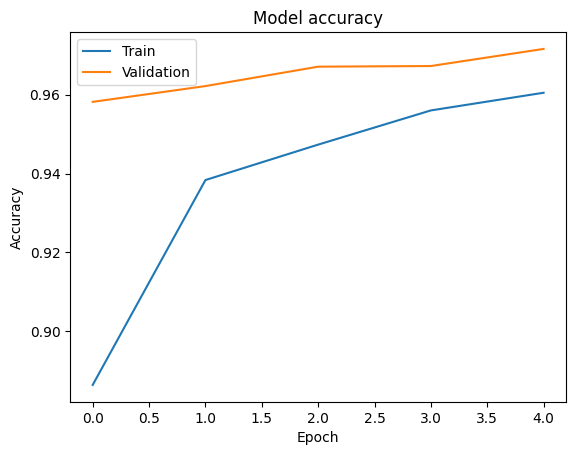

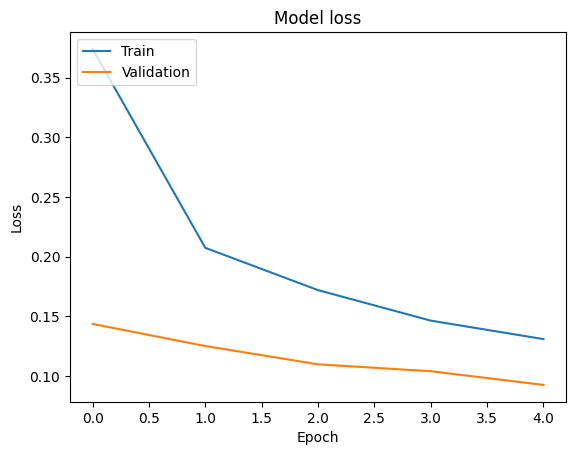

In [24]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])	
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()